# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_by_city_total = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_by_city_total.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_by_city_total = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_by_city_total.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fare_by_city_total = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_by_city_total.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
ave_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
ave_fare_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
ave_fare_driver = fare_by_city_total / driver_by_city_total
ave_fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

## Additional Statistic: Number of Rides per Driver

In [8]:
# 5B. Get the average ride per driver for each city type. 
ave_ride_driver = ride_by_city_total / driver_by_city_total
ave_ride_driver.head()

type
Rural       1.602564
Suburban    1.275510
Urban       0.675676
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df =  pd.DataFrame({
            "Total Rides": ride_by_city_total,
            "Total Drivers": driver_by_city_total,
            "Total Fares": fare_by_city_total,
            "Average Fare per Ride": ave_fare_ride,
            "Average Fare per Driver": ave_fare_driver,
            "Average Rides per Driver": ave_ride_driver})
# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver,Average Rides per Driver
type,,,,,,
Rural,125,78,4327.93,34.623440,55.486282,1.602564
Suburban,625,490,19356.33,30.970128,39.502714,1.275510
Urban,1625,2405,39854.38,24.525772,16.571468,0.675676


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df["Average Rides per Driver"] = pyber_summary_df["Average Rides per Driver"].map("{:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver,Average Rides per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49,1.60
Suburban,625,490,"$19,356.33",$30.97,$39.50,1.28
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57,0.68


## Added: Summary of Total PyBer Data

In [46]:
Total_Pyber_Rides = ride_data_df.count()["ride_id"]
Total_Pyber_Drivers = city_data_df.sum()["driver_count"]
Total_Pyber_Fares = ride_data_df.sum()["fare"]

Total_Ave_Fare = Total_Pyber_Fares / Total_Pyber_Rides
Total_Fare_per_Driver = Total_Pyber_Fares / Total_Pyber_Drivers
Total_Rides_per_Driver = Total_Pyber_Rides / Total_Pyber_Drivers

print(f"PyBer has a total of {Total_Pyber_Drivers} drivers booking {Total_Pyber_Rides} rides earning {Total_Pyber_Fares} in total fares.")
print(f"That equates to an average fare of {Total_Ave_Fare} per ride.")
print(f"That equates to an average TOTAL fare of {Total_Fare_per_Driver} per driver.")
print(f"That equates to an average of {Total_Rides_per_Driver} per driver.")

PyBer has a total of 2973 drivers booking 2375 rides earning 63538.64000000014 in total fares.
That equates to an average fare of 26.753111578947426 per ride.
That equates to an average TOTAL fare of 21.37189371005723 per driver.
That equates to an average of 0.7988563740329634 per driver.


## Added: Plots of Summary DataFrame

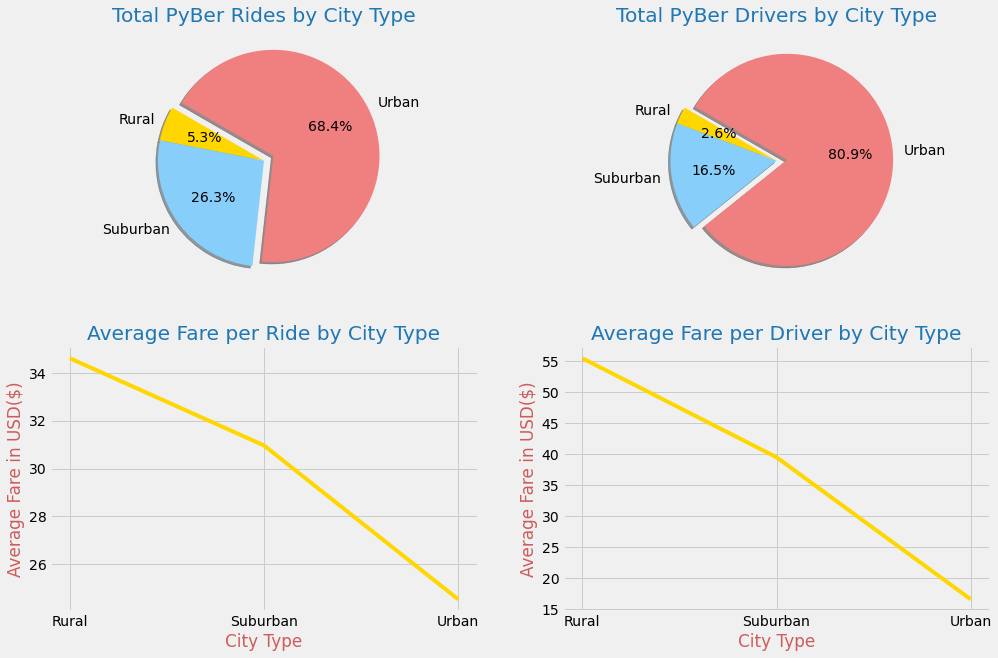

In [37]:
plt.style.use('fivethirtyeight')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0,0].pie(ride_by_city_total,
            labels=["Rural", "Suburban", "Urban"],
            colors=["gold", "lightskyblue", "lightcoral"],
            explode=[0, 0, 0.1],
            autopct='%1.1f%%',
            shadow=True, startangle=150)
axs[0,0].set_title('Total PyBer Rides by City Type', color = "Tab:blue")

axs[0,1].pie(driver_by_city_total,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)      
axs[0,1].set_title('Total PyBer Drivers by City Type', color = "Tab:blue")
#axs[0,1].set_xlabel('City Type')
#axs[0,1].set_ylabel('Total Drivers')
#mpl.rcParams['font.size'] = 14

axs[1,0].plot(ave_fare_ride, color = "gold")
axs[1,0].set_title('Average Fare per Ride by City Type', color = "Tab:blue")
axs[1,0].set_xlabel('City Type', color = "indianred")
axs[1,0].set_ylabel('Average Fare in USD($)', color = "indianred")

axs[1,1].plot(ave_fare_driver, color = "gold")
axs[1,1].set_title('Average Fare per Driver by City Type', color = "Tab:blue")
axs[1,1].set_xlabel('City Type', color = "indianred")
axs[1,1].set_ylabel('Average Fare in USD($)', color = "indianred")

plt.savefig('Analysis/summary_plots.png')
plt.show()


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
# Created a datetime date prior to groupby, pivot, and resampling; tested output both ways.
import datetime as dt

pyber_data_df['short_date'] = pyber_data_df['date'].str.slice(0,10)
pyber_data_df


,city,date,fare,ride_id,driver_count,type,short_date
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,2019-04-29
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,2019-01-30
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,2019-02-10
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,2019-05-07


In [14]:
# PRACTICE: Additional step to convert date to dateststamp and reformat prior to groupby, pivot, and resample....practice!
# Convert Date from object to datestamp; created a refofrmatted date: date_cnvrt
pyber_data_df['short_date'] = pd.to_datetime(pyber_data_df['short_date'])              
pyber_data_df['date_cnvrt'] = pyber_data_df['short_date'].dt.strftime('%m/%d/%Y')
pyber_data_df

,city,date,fare,ride_id,driver_count,type,short_date,date_cnvrt
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14,01/14/2019
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04,03/04/2019
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24,02/24/2019
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10,02/10/2019
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06,03/06/2019
...,...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,2019-04-29,04/29/2019
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,2019-01-30,01/30/2019
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,2019-02-10,02/10/2019
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,2019-05-07,05/07/2019


In [60]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_df = pyber_data_df.groupby(['type','date']).sum()[['fare']]
fare_by_date_df


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [61]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_df = fare_by_date_df.reset_index()
fare_by_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [62]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_date_pvt_df = fare_by_date_df.pivot(index='date', columns='type', values='fare')
fare_date_pvt_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [68]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

#fare_date_range_df = fare_date_pvt_df.loc[(fare_date_pvt_df.index >= '2019-01-01') or (fare_date_pvt_df.index < '2019-04-29')]


fare_date_range_df = fare_date_pvt_df.loc[(fare_date_pvt_df.index<('2019-04-30'))]
fare_date_range_df
                     

#res = df[pd.Timestamp('2010-11-01'):pd.Timestamp('2010-11-10')]



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [69]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_date_range_df.index = pd.to_datetime(fare_date_range_df.index)
fare_date_range_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [70]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_date_range_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


## Fares by Week: resample

In [71]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week_df = fare_date_range_df.resample("W").sum()

fare_by_week_df 

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Graph Weekly Fares by City Type

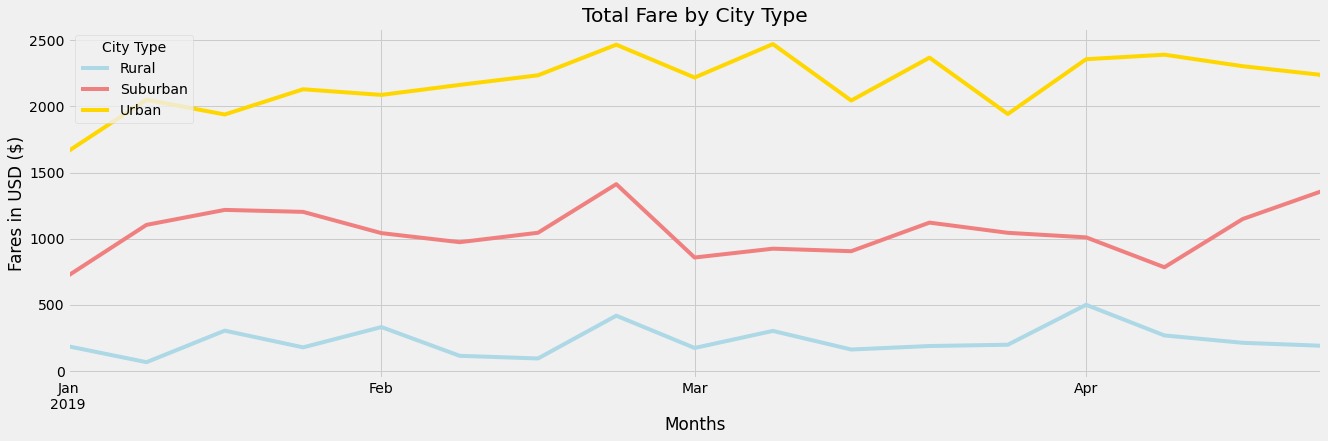

In [73]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.style as style
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


style.available

#fig, ax = plt.subplots(figsize = (16,8))
#ax.plot(fare_by_week_df)

fare_by_week_df.plot(figsize = (20,6), label='City Type', color = ("lightblue", "lightcoral", "gold"))
plt.style.use('fivethirtyeight')
plt.xlabel('Months')

plt.ylabel('Fares in USD ($)')
plt.title('Total Fare by City Type')
plt.xlim('2019-01-01', '2019-04-28')
#formatter = ticker.FormatStrFormatter('$%0.1f')
#ax.yaxis.set_major_formatter(formatter)

plt.legend(loc = 2, title="City Type")
plt.savefig('Analysis/fare_weekly.png')
plt.show()



##  Added: Chart with Percentage of Drivers with No Rides

In [74]:
#groupby driver to see if any zero drivers are in dataset
#ride_data_df
city_ride_df = pyber_data_df.groupby(["city"]).count()["ride_id"]
#city_ride_df

# Pick-up the city type from the city_data
city_driver_df = pd.merge(city_ride_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
city_driver_df


,city,ride_id,driver_count,type
0,Amandaburgh,18,12,Urban
1,Barajasview,22,26,Urban
2,Barronchester,16,11,Suburban
3,Bethanyland,18,22,Suburban
4,Bradshawfurt,10,7,Rural
...,...,...,...,...
115,West Robert,31,39,Urban
116,West Samuelburgh,25,73,Urban
117,Williamsonville,14,2,Suburban
118,Williamsstad,23,59,Urban


In [75]:
#df.groupby(['country', 'month'])['revenue', 'profit', 'ebit'].sum().reset_index()
city_driver_summary_df = city_driver_df.groupby(["city", "type"])["ride_id", "driver_count"].sum()



/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [25]:
# Find the cities with more drivers than rides
city_driver_summary_df["delta"] = city_driver_summary_df["ride_id"] - city_driver_summary_df["driver_count"]
city_driver_summary_df = city_driver_summary_df
city_driver_summary_df

,,ride_id,driver_count,delta
city,type,,,
Amandaburgh,Urban,18,12,6
Barajasview,Urban,22,26,-4
Barronchester,Suburban,16,11,5
Bethanyland,Suburban,18,22,-4
Bradshawfurt,Rural,10,7,3
...,...,...,...,...
West Robert,Urban,31,39,-8
West Samuelburgh,Urban,25,73,-48
Williamsonville,Suburban,14,2,12


In [26]:
# Print out cities that have more drivers than fares
too_many_drivers_df = city_driver_summary_df.loc[(city_driver_summary_df.delta < 0)]

# Sort the difference between drivers and rides: ascending
drivers_sorted = too_many_drivers_df.sort_values('delta', ascending=True)
drivers_sorted = drivers_sorted.reset_index()

# Format this columns
drivers_sorted.rename(columns={'city':'City', 'type':'City Type','ride_id':'Total Rides', 'driver_count':'Total Drivers', 'delta':'Difference'}, inplace=True)
drivers_sorted.to_csv('Analysis/too_many_driver.csv', header=True, index = True)

drivers_sorted.head(20)


,City,City Type,Total Rides,Total Drivers,Difference
0,West Samuelburgh,Urban,25,73,-48
1,Reynoldsfurt,Urban,19,67,-48
2,Port Angela,Urban,19,67,-48
3,South Michelleport,Urban,31,72,-41
4,West Anthony,Urban,30,70,-40
5,Jerryton,Urban,25,64,-39
6,Pattyland,Urban,21,59,-38
7,Williamsstad,Urban,23,59,-36
8,Grahamburgh,Urban,25,61,-36
9,Liumouth,Urban,33,69,-36


In [47]:
#total drivers vs rides in 65 cities with more drivers than rides
too_many_drivers1 = drivers_sorted.count()["City"]
too_many_drivers2 = drivers_sorted.sum()["Total Rides"]
too_many_drivers3 = drivers_sorted.sum()["Total Drivers"]
too_many_drivers4 = too_many_drivers3 - too_many_drivers2

print(f"In {too_many_drivers1} cities where there are more drivers than rides booked, there is a total of {too_many_drivers3} PyBer drivers, but only {too_many_drivers2} rides were booked.")
print(f"The difference: {too_many_drivers4}.")



In 65 cities where there are more drivers than rides booked, there is a total of 2473 PyBer drivers, but only 1380 rides were booked.
The difference: 1093.


## Added: Totals Caluclated for Recommendation Section

In [76]:
Total_Pyber_Rides = ride_data_df.count()["ride_id"]
Total_Pyber_Drivers = city_data_df.sum()["driver_count"]
Total_Pyber_Fares = ride_data_df.sum()["fare"]

Total_Ave_Fare = Total_Pyber_Fares / Total_Pyber_Rides
Total_Fare_per_Driver = Total_Pyber_Fares / Total_Pyber_Drivers
Total_Rides_per_Driver = Total_Pyber_Rides / Total_Pyber_Drivers

print(f"PyBer has a total of {Total_Pyber_Drivers:,} drivers booking {Total_Pyber_Rides:,} rides earning ${Total_Pyber_Fares:,.2f} in total fares.")
print(f"Average fare per ride during this time period: ${Total_Ave_Fare:.2f}")
print(f"Average TOTAL fares per driver for this time period: ${Total_Fare_per_Driver:.2f}")
print(f"Average rides booked per driver for this time period: {Total_Rides_per_Driver:,.2f}.")

PyBer has a total of 2,973 drivers booking 2,375 rides earning $63,538.64 in total fares.
Average fare per ride during this time period: $26.75
Average TOTAL fares per driver for this time period: $21.37
Average rides booked per driver for this time period: 0.80.


In [77]:
# Recalculate averages by removing "inactive" drivers
Total_Ave_Fare = Total_Pyber_Fares / Total_Pyber_Rides
Total_Fare_Driver_updt = Total_Pyber_Fares / too_many_drivers4
Total_Rides_Driver_updt = Total_Pyber_Rides / too_many_drivers4

print(f"By removing the {too_many_drivers4:,} inactive PyBer drivers, the averages per driver are now:") 
print(f"Average TOTAL fares per driver for this time period: ${Total_Fare_Driver_updt:.2f}")
print(f"Average rides booked per driver for this time period: {Total_Rides_Driver_updt:,.2f}.")

By removing the 1,093 inactive PyBer drivers, the averages per driver are now:
Average TOTAL fares per driver for this time period: $58.13
Average rides booked per driver for this time period: 2.17.
